<a href="https://colab.research.google.com/github/FaustoFLES/Programacion-Analitica/blob/main/Pr%C3%A1ctica_17_Avances_del_Proyecto_Semana_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avance del Proyecto

[Escribe aquí el Título del Proyecto]


**Etapas: Métricas de Calidad de los Datos, Análisis Descriptivo y Preprocesamiento**

Nombre: [Nombre y Apellidos]

Matrícula:

Fecha: [dd/mm/aaaa]

## 1) Introducción
- Descripción breve del problema que se pretende abordar.
Disminuir los tiempos de operacion y aumentar las ganancias de las PYMES de logistica
- Objetivo general del proyecto y objetivos específicos.
Aumentar ganancias y dimsminuir tiempos
- Contexto del dataset en relación con el problema planteado.
Son datos de una flota canadiense

## 2) Descripción del dataset
- Fuente de los datos.
Kagle
- Número de registros y variables.
+50000
- Variables principales de interés.
Ganancias
- Limitaciones del dataset.
Son muchas variables

In [ ]:
import pandas as pd

# Ejemplo: Dataset Titanic
df = pd.read_csv("/content/drive/MyDrive/Escuela/Maestria/3er Semestre/Programacion Analitica/Proyecto/Dataset/CFAF_C2011-2017_Code_E.csv")

print("Dimensiones:", df.shape)
df.head()

Dimensiones: (58721, 15)


,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
0,2011,TF,OTHMF,559,ON,CA,825,AB,CA,59,"28,284.20","58,508.90","220,471.00","105,783.50","560,727.50"
1,2011,TF,OTHMF,559,ON,CA,835,AB,CA,127,"138,919.10","100,204.10","478,640.00","523,088.60","1,634,366.40"
2,2011,TF,OTHMF,559,ON,CA,933,BC,CA,42,"22,850.60","52,947.40","196,805.00","107,261.20","1,258,757.70"
3,2011,TF,OTHMF,600,MB,CA,421,QC,CA,49,"612,882.10","292,874.20","185,448.00","2,374,926.80","8,193,369.40"
4,2011,TF,OTHMF,600,MB,CA,537,ON,CA,17,"15,362.50","13,966.20","36,060.00","32,817.00","299,427.20"


In [ ]:
# Perform descriptive analysis
print("Descriptive analysis of the dataset:")
display(df.describe())

Descriptive analysis of the dataset:


,Year,OrigCMA,DestCMA
count,58721.000000,58721.000000,58721.000000
mean,2013.998757,526.763338,510.603958
std,2.005344,255.814067,261.548131
min,2011.000000,100.000000,100.000000
25%,2012.000000,400.000000,205.000000
50%,2014.000000,535.000000,535.000000
75%,2016.000000,725.000000,725.000000
max,2017.000000,933.000000,933.000000


## 3) Preguntas de análisis descriptivo
- Formular al menos tres preguntas directamente relacionadas con el problema del proyecto.

Ejemplos:
- ¿Cuál es la distribución de la variable objetivo?
- ¿Qué diferencias existen entre categorías relevantes (ejemplo: clientes con y sin deuda, hombres y mujeres, productos por región)?
- ¿Existen valores atípicos que distorsionen la interpretación del conjunto de datos?

In [ ]:
import numpy as np

# Select relevant numerical columns
numerical_cols = ['Revenue', 'Weight', 'Distance', 'TonneKm', 'Shipments', 'Value']

# Convert columns to numeric, coercing errors
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# Identify outliers using IQR
outlier_indices = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_indices[col] = outliers.index

print("Indices of potential outliers based on IQR:")
for col, indices in outlier_indices.items():
    print(f"\n'{col}': {len(indices)} outliers")
    if len(indices) > 0:
        # Display the first 5 outlier rows for each column for inspection
        display(df.loc[indices].head())

Indices of potential outliers based on IQR:

'Revenue': 8923 outliers


,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
9,2011,TF,OTHMF,602,MB,CA,170,UM,UM,21444.9,7.218528e+07,24522928.1,47065348.9,147791031.9,2.239739e+09
12,2011,TF,OTHMF,602,MB,CA,500,ON,CA,17792.5,1.894680e+07,7782668.8,21592840.5,24702311.9,3.092358e+08
15,2011,TF,OTHMF,602,MB,CA,800,AB,CA,3838.0,1.574593e+07,7391055.5,5501946.2,24106984.3,1.113478e+09
20,2011,TF,OTHMF,700,SK,CA,725,SK,CA,29788.5,1.115660e+08,28038298.8,9416513.2,44504478.4,1.447016e+09
24,2011,TF,PLCHM,170,UM,UM,535,ON,CA,167549.0,1.031723e+09,133202485.7,186331813.9,867218441.9,5.462224e+09



'Weight': 9530 outliers


,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
9,2011,TF,OTHMF,602,MB,CA,170,UM,UM,21444.9,7.218528e+07,24522928.1,47065348.9,147791031.9,2.239739e+09
20,2011,TF,OTHMF,700,SK,CA,725,SK,CA,29788.5,1.115660e+08,28038298.8,9416513.2,44504478.4,1.447016e+09
24,2011,TF,PLCHM,170,UM,UM,535,ON,CA,167549.0,1.031723e+09,133202485.7,186331813.9,867218441.9,5.462224e+09
25,2011,TF,PLCHM,170,UM,UM,602,MB,CA,17889.5,9.762071e+07,21422039.7,34307293.7,176747393.1,5.530838e+08
26,2011,TF,PLCHM,170,UM,UM,800,AB,CA,9884.8,1.036396e+08,23766763.2,27037433.1,246947877.1,2.853944e+08



'Distance': 8680 outliers


,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
9,2011,TF,OTHMF,602,MB,CA,170,UM,UM,21444.9,72185279.2,24522928.1,47065348.9,147791031.9,2.239739e+09
11,2011,TF,OTHMF,602,MB,CA,400,QC,CA,2901.0,2086425.6,905104.7,7392504.7,5695591.4,4.925610e+07
12,2011,TF,OTHMF,602,MB,CA,500,ON,CA,17792.5,18946804.6,7782668.8,21592840.5,24702311.9,3.092358e+08
14,2011,TF,OTHMF,602,MB,CA,535,ON,CA,16695.5,26794850.3,5566820.1,34474040.8,55359065.2,3.818705e+08
16,2011,TF,OTHMF,602,MB,CA,825,AB,CA,7182.7,12157852.9,2940301.5,9588061.2,16181444.2,3.044966e+08



'TonneKm': 8824 outliers


,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
9,2011,TF,OTHMF,602,MB,CA,170,UM,UM,21444.9,7.218528e+07,24522928.1,47065348.9,147791031.9,2.239739e+09
24,2011,TF,PLCHM,170,UM,UM,535,ON,CA,167549.0,1.031723e+09,133202485.7,186331813.9,867218441.9,5.462224e+09
25,2011,TF,PLCHM,170,UM,UM,602,MB,CA,17889.5,9.762071e+07,21422039.7,34307293.7,176747393.1,5.530838e+08
26,2011,TF,PLCHM,170,UM,UM,800,AB,CA,9884.8,1.036396e+08,23766763.2,27037433.1,246947877.1,2.853944e+08
44,2011,TF,PLCHM,400,QC,CA,170,UM,UM,40743.4,5.020174e+08,59752611.4,61768602.8,509781334.3,2.346237e+09



'Shipments': 9284 outliers


,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
5,2011,TF,OTHMF,600,MB,CA,600,MB,CA,10145.7,20010684.3,4761714.6,2554441.2,3158124.0,2.745677e+08
9,2011,TF,OTHMF,602,MB,CA,170,UM,UM,21444.9,72185279.2,24522928.1,47065348.9,147791031.9,2.239739e+09
12,2011,TF,OTHMF,602,MB,CA,500,ON,CA,17792.5,18946804.6,7782668.8,21592840.5,24702311.9,3.092358e+08
14,2011,TF,OTHMF,602,MB,CA,535,ON,CA,16695.5,26794850.3,5566820.1,34474040.8,55359065.2,3.818705e+08
16,2011,TF,OTHMF,602,MB,CA,825,AB,CA,7182.7,12157852.9,2940301.5,9588061.2,16181444.2,3.044966e+08



'Value': 9652 outliers


,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
5,2011,TF,OTHMF,600,MB,CA,600,MB,CA,10145.7,20010684.3,4761714.6,2554441.2,3158124.0,2.745677e+08
9,2011,TF,OTHMF,602,MB,CA,170,UM,UM,21444.9,72185279.2,24522928.1,47065348.9,147791031.9,2.239739e+09
12,2011,TF,OTHMF,602,MB,CA,500,ON,CA,17792.5,18946804.6,7782668.8,21592840.5,24702311.9,3.092358e+08
14,2011,TF,OTHMF,602,MB,CA,535,ON,CA,16695.5,26794850.3,5566820.1,34474040.8,55359065.2,3.818705e+08
15,2011,TF,OTHMF,602,MB,CA,800,AB,CA,3838.0,15745927.3,7391055.5,5501946.2,24106984.3,1.113478e+09


In [ ]:
# Analyze differences in metrics across 'Mode' categories
print("Differences across 'Mode' categories:")
display(df.groupby('Mode')[['Revenue', 'Weight', 'Distance', 'TonneKm', 'Shipments']].describe())

# Analyze differences in metrics across 'SCTGGroup' categories
print("\nDifferences across 'SCTGGroup' categories:")
display(df.groupby('SCTGGroup')[['Revenue', 'Weight', 'Distance', 'TonneKm', 'Shipments']].describe())

Differences across 'Mode' categories:


Revenue                        Weight                             \
       count unique        top freq  count unique            top freq   
Mode                                                                    
AR       583    582  64,895.50    2    583    583  12,416,850.00    1   
RL     17497  16909         15    7  17497  13803      90,700.00   38   
TF     39081  37996          1    9  39081  36261          226.8   60   

     Distance                       TonneKm                            \
        count unique       top freq   count unique           top freq   
Mode                                                                    
AR        583    581  4,916.00    2     583    583  8,110,743.00    1   
RL      17497  16422        20    8   17497  17410    226,312.00    3   
TF      39081  37748  7,331.00    6   39081  38610             4    6   

     Shipments                   
         count unique top  freq  
Mode                             
AR         583    515   4    10  
RL       17497   3840   1  1322  
TF       39081  19875   1  2187


Differences across 'SCTGGroup' categories:


Revenue                        Weight                         \
            count unique        top freq  count unique        top freq   
SCTGGroup                                                                
AGRI         5138   5107        134    3   5138   4909      453.6    8   
BMETL        5819   5803        114    3   5819   5632  79,800.00    8   
COAL          714    712  12,093.00    2    714    671      952.6    6   
FOOD         5145   5120        813    3   5145   4948  83,500.00   10   
FRPAP        5777   5768        166    2   5777   5620  84,400.00    6   
FUELS        4586   4554       53.8    3   4586   4347          1    8   
MISC         5282   5262          1    3   5282   5147   1,000.00   14   
MNRLS        3678   3654       54.4    3   3678   3497      226.8    9   
OTHMF        5417   5410   3,620.40    2   5417   5272      226.8    9   
PLCHM        6087   6074  95,992.40    2   6087   5925  87,100.00   13   
TRANS        5998   5967        119    3   5998   5667  26,508.00   14   
WASTE        3520   3494          1    3   3520   3287  90,700.00    9   

          Distance                       TonneKm                            \
             count unique       top freq   count unique           top freq   
SCTGGroup                                                                    
AGRI          5138   5078  3,435.00    3    5138   5130      2,292.00    2   
BMETL         5819   5777  1,014.00    3    5819   5813      2,187.70    2   
COAL           714    704  1,386.00    2     714    710     16,382.00    2   
FOOD          5145   5082  1,328.00    3    5145   5136    105,810.00    2   
FRPAP         5777   5748        67    2    5777   5774  1,337,428.00    2   
FUELS         4586   4512  1,211.00    4    4586   4572           3.5    3   
MISC          5282   5251        19    3    5282   5261           3.4    3   
MNRLS         3678   3632       666    3    3678   3674     24,500.00    2   
OTHMF         5417   5367  4,914.00    4    5417   5412      1,114.50    2   
PLCHM         6087   6048       918    3    6087   6082      3,893.30    2   
TRANS         5998   5917       785    5    5998   5988     63,994.00    2   
WASTE         3520   3442  4,973.00    4    3520   3510           2.2    2   

          Shipments                  
              count unique top freq  
SCTGGroup                            
AGRI           5138   2807   1  374  
BMETL          5819   3419   1  238  
COAL            714    305   1  165  
FOOD           5145   3232   1  316  
FRPAP          5777   3193   1  234  
FUELS          4586   2094   1  396  
MISC           5282   4125   1  223  
MNRLS          3678   1989   1  340  
OTHMF          5417   3447   1  326  
PLCHM          6087   3273   1  213  
TRANS          5998   3113   1  295  
WASTE          3520   1613   1  389

In [ ]:
# Check descriptive statistics for the 'Revenue' column
print("Descriptive Statistics for Revenue:")
display(df['Revenue'].describe())

# Check the distribution of categorical variables that might be relevant to revenue
print("\nDistribution of 'Mode':")
display(df['Mode'].value_counts())

print("\nDistribution of 'SCTGGroup':")
display(df['SCTGGroup'].value_counts())

Descriptive Statistics for Revenue:


,Revenue
count,57161
unique,55118
top,1
freq,11



Distribution of 'Mode':


,count
Mode,
TF,39081
RL,17497
AR,2143



Distribution of 'SCTGGroup':


,count
SCTGGroup,
MISC,6842
PLCHM,6087
TRANS,5998
BMETL,5819
FRPAP,5777
OTHMF,5417
FOOD,5145
AGRI,5138
FUELS,4586


## 4) Métricas de calidad de los datos

In [ ]:
# Valores faltantes
df.isnull().sum()

# Duplicados
df.duplicated().sum()

# Tipos de datos
df.dtypes

,0
Year,int64
Mode,object
SCTGGroup,object
OrigCMA,int64
OrigProv,object
OrigCtry,object
DestCMA,int64
DestProv,object
DestCtry,object
Shipments,float64


## 5) Análisis descriptivo de los datos

In [ ]:
# Estadísticos básicos
display(df.describe())

# Tabla de frecuencias (ejemplo con variable categórica)
print("\nDistribution of 'Mode':")
display(df['Mode'].value_counts())

print("\nDistribution of 'SCTGGroup':")
display(df['SCTGGroup'].value_counts())

,Year,OrigCMA,DestCMA,Shipments,Weight,Revenue,Distance,TonneKm,Value
count,58721.000000,58721.000000,58721.000000,5.716100e+04,5.716100e+04,5.716100e+04,5.716100e+04,5.716100e+04,5.716100e+04
mean,2013.998757,526.763338,510.603958,8.524014e+03,1.229849e+08,6.728223e+06,6.505267e+06,9.328309e+07,2.902220e+08
std,2.005344,255.814067,261.548131,4.987552e+04,7.862578e+08,3.126608e+07,3.218548e+07,6.464821e+08,2.023649e+09
min,2011.000000,100.000000,100.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2012.000000,400.000000,205.000000,1.500000e+01,6.147060e+04,1.364580e+04,3.188100e+04,1.135390e+05,1.492145e+05
50%,2014.000000,535.000000,535.000000,1.990000e+02,1.986460e+06,2.806851e+05,3.258030e+05,2.839874e+06,4.215290e+06
75%,2016.000000,725.000000,725.000000,2.137000e+03,2.385752e+07,2.499997e+06,2.549147e+06,2.648412e+07,5.586537e+07
max,2017.000000,933.000000,933.000000,2.817910e+06,3.400031e+10,2.233629e+09,1.711415e+09,2.979883e+10,1.665739e+11



Distribution of 'Mode':


,count
Mode,
TF,39081
RL,17497
AR,2143



Distribution of 'SCTGGroup':


,count
SCTGGroup,
MISC,6842
PLCHM,6087
TRANS,5998
BMETL,5819
FRPAP,5777
OTHMF,5417
FOOD,5145
AGRI,5138
FUELS,4586


## 6) Preprocesamiento de los datos

In [ ]:
# Check for missing values before imputation
print("Missing values before imputation:")
display(df.isnull().sum())

# Imputación de valores faltantes en columnas numéricas relevantes con la media
numerical_cols_with_missing = ['Shipments', 'Weight', 'Revenue', 'Distance', 'TonneKm', 'Value'] # Assuming these are the columns with potential missing values

for col in numerical_cols_with_missing:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Eliminación de duplicados
df = df.drop_duplicates()

# Check for missing values after imputation
print("\nMissing values after imputation:")
display(df.isnull().sum())

# Display data types after potential conversion (no specific columns to convert based on previous analysis)
print("\nData types after processing:")
display(df.dtypes)

Missing values before imputation:


,0
Year,0
Mode,0
SCTGGroup,0
OrigCMA,0
OrigProv,0
OrigCtry,0
DestCMA,0
DestProv,0
DestCtry,0
Shipments,1560



Missing values after imputation:


/tmp/ipython-input-2044001451.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,0
Year,0
Mode,0
SCTGGroup,0
OrigCMA,0
OrigProv,0
OrigCtry,0
DestCMA,0
DestProv,0
DestCtry,0
Shipments,0



Data types after processing:


,0
Year,int64
Mode,object
SCTGGroup,object
OrigCMA,int64
OrigProv,object
OrigCtry,object
DestCMA,int64
DestProv,object
DestCtry,object
Shipments,float64


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Datos de ejemplo (una sola característica)
X = np.array([[5], [10], [15], [20], [25]])

# Crear y aplicar el escalador con el rango [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

print("Datos originales:\n", X)
print("Datos normalizados:\n", X_scaled)


Datos originales:
 [[ 5]
 [10]
 [15]
 [20]
 [25]]
Datos normalizados:
 [[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


In [ ]:
#Ajuste a un rango diferente, por ejemplo [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled_custom = scaler.fit_transform(X)

print("Datos normalizados en [-1,1]:\n", X_scaled_custom)


Datos normalizados en [-1,1]:
 [[-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [ 1. ]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns to scale
numerical_cols_to_scale = ['Shipments', 'Weight', 'Revenue', 'Distance', 'TonneKm', 'Value']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print("DataFrame after applying MinMaxScaler:")
display(df.head())

DataFrame after applying MinMaxScaler:


,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
0,2011,TF,OTHMF,559,ON,CA,825,AB,CA,0.000021,8.318513e-07,0.000026,0.000129,0.000004,0.000003
1,2011,TF,OTHMF,559,ON,CA,835,AB,CA,0.000045,4.085790e-06,0.000045,0.000280,0.000018,0.000010
2,2011,TF,OTHMF,559,ON,CA,933,BC,CA,0.000015,6.720410e-07,0.000024,0.000115,0.000004,0.000008
3,2011,TF,OTHMF,600,MB,CA,421,QC,CA,0.000017,1.802575e-05,0.000131,0.000108,0.000080,0.000049
4,2011,TF,OTHMF,600,MB,CA,537,ON,CA,0.000006,4.518047e-07,0.000006,0.000021,0.000001,0.000002


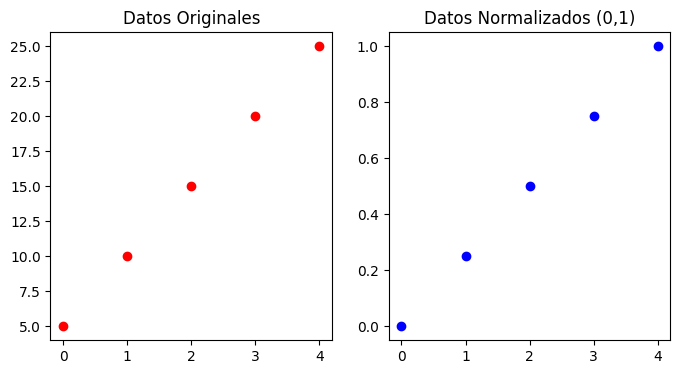

In [ ]:
# 📉 Comparación antes y después del Min-Max Scaling

import matplotlib.pyplot as plt

# Visualizar los datos originales vs normalizados
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(X)), X, color='red', label="Original")
plt.title("Datos Originales")

plt.subplot(1, 2, 2)
plt.scatter(range(len(X_scaled)), X_scaled, color='blue', label="Min-Max Scaling")
plt.title("Datos Normalizados (0,1)")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select some numerical columns to visualize
cols_to_visualize = ['Revenue', 'Weight', 'Distance', 'Shipments']

print("Visualizing the distributions of scaled numerical columns:")

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_visualize):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Scaled {col} Distribution')
plt.tight_layout()
plt.show()

# To see the comparison, you would typically run similar visualization code
# on the unscaled data before applying the MinMaxScaler.

Visualizing the distributions of scaled numerical columns:


KeyboardInterrupt: 

In [ ]:
# Handle outliers by capping using the IQR method

numerical_cols_to_cap = ['Revenue', 'Weight', 'Distance', 'TonneKm', 'Shipments', 'Value']

for col in numerical_cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("DataFrame after capping outliers:")
display(df.describe()) # Display descriptive statistics to see the effect of capping

DataFrame after capping outliers:


,Year,OrigCMA,DestCMA,Shipments,Weight,Revenue,Distance,TonneKm,Value
count,58721.000000,58721.000000,58721.000000,58721.000000,58721.000000,58721.000000,58721.000000,58721.000000,58721.000000
mean,2013.998757,526.763338,510.603958,0.000602,0.000566,0.000873,0.001150,0.000697,0.000272
std,2.005344,255.814067,261.548131,0.000870,0.000830,0.001244,0.001617,0.001001,0.000402
min,2011.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,400.000000,205.000000,0.000005,0.000002,0.000007,0.000020,0.000004,0.000001
50%,2014.000000,535.000000,535.000000,0.000080,0.000067,0.000143,0.000213,0.000109,0.000029
75%,2016.000000,725.000000,725.000000,0.000919,0.000869,0.001346,0.001782,0.001069,0.000419
max,2017.000000,933.000000,933.000000,0.002289,0.002168,0.003354,0.004425,0.002666,0.001046


Visualizing the distributions of original vs. scaled numerical columns:


/tmp/ipython-input-3541134480.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


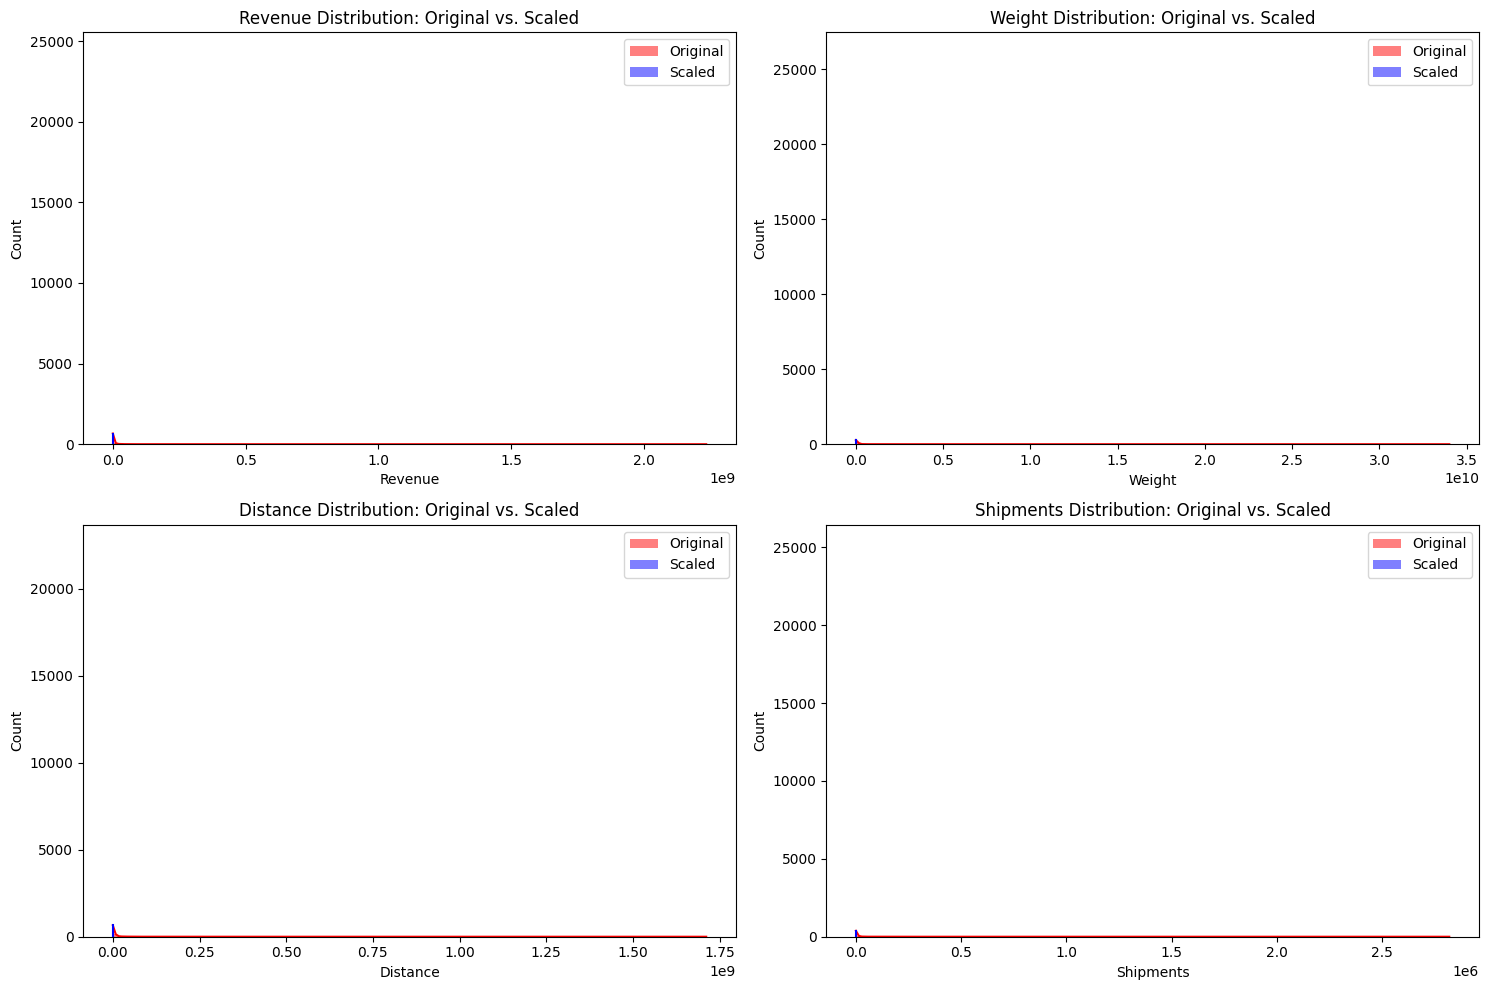

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the original dataset to have the unscaled data
try:
    df_original = pd.read_csv("/content/drive/MyDrive/Escuela/Maestria/3er Semestre/Programacion Analitica/Proyecto/Dataset/CFAF_C2011-2017_Code_E.csv")

    # Convert necessary columns to numeric, coercing errors, for the original data
    numerical_cols = ['Revenue', 'Weight', 'Distance', 'TonneKm', 'Shipments', 'Value']
    for col in numerical_cols:
        df_original[col] = pd.to_numeric(df_original[col].astype(str).str.replace(',', ''), errors='coerce')

    # Create a copy of the original data for scaling
    df_scaled = df_original.copy()

    # Apply MinMaxScaler to the copy
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    numerical_cols_to_scale = ['Shipments', 'Weight', 'Revenue', 'Distance', 'TonneKm', 'Value']
    df_scaled[numerical_cols_to_scale] = scaler.fit_transform(df_scaled[numerical_cols_to_scale])


    # Select some numerical columns to visualize
    cols_to_visualize = ['Revenue', 'Weight', 'Distance', 'Shipments']

    print("Visualizing the distributions of original vs. scaled numerical columns:")

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols_to_visualize):
        plt.subplot(2, 2, i + 1)
        sns.histplot(df_original[col], kde=True, color='red', label='Original')
        sns.histplot(df_scaled[col], kde=True, color='blue', label='Scaled')
        plt.title(f'{col} Distribution: Original vs. Scaled')
        plt.legend()

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: The dataset file was not found. Please ensure the file path is correct.")
    print("File path attempted: /content/drive/MyDrive/Escuela/Maestria/3er Semestre/Programacion Analitica/Proyecto/Dataset/CFAF_C2011-2017_Code_E.csv")

DataFrame after applying Z-Score Scaling:


,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
0,2011,TF,OTHMF,559,ON,CA,825,AB,CA,-0.169724,-0.156383,-0.213323,-0.195270,-0.144131,-0.143139
1,2011,TF,OTHMF,559,ON,CA,835,AB,CA,-0.168361,-0.156243,-0.211989,-0.187248,-0.143486,-0.142609
2,2011,TF,OTHMF,559,ON,CA,933,BC,CA,-0.170065,-0.156390,-0.213501,-0.196005,-0.144129,-0.142794
3,2011,TF,OTHMF,600,MB,CA,421,QC,CA,-0.169925,-0.155640,-0.205827,-0.196358,-0.140621,-0.139368
4,2011,TF,OTHMF,600,MB,CA,537,ON,CA,-0.170566,-0.156400,-0.214748,-0.200999,-0.144244,-0.143269



Visualizing the distributions of Z-Score scaled numerical columns:


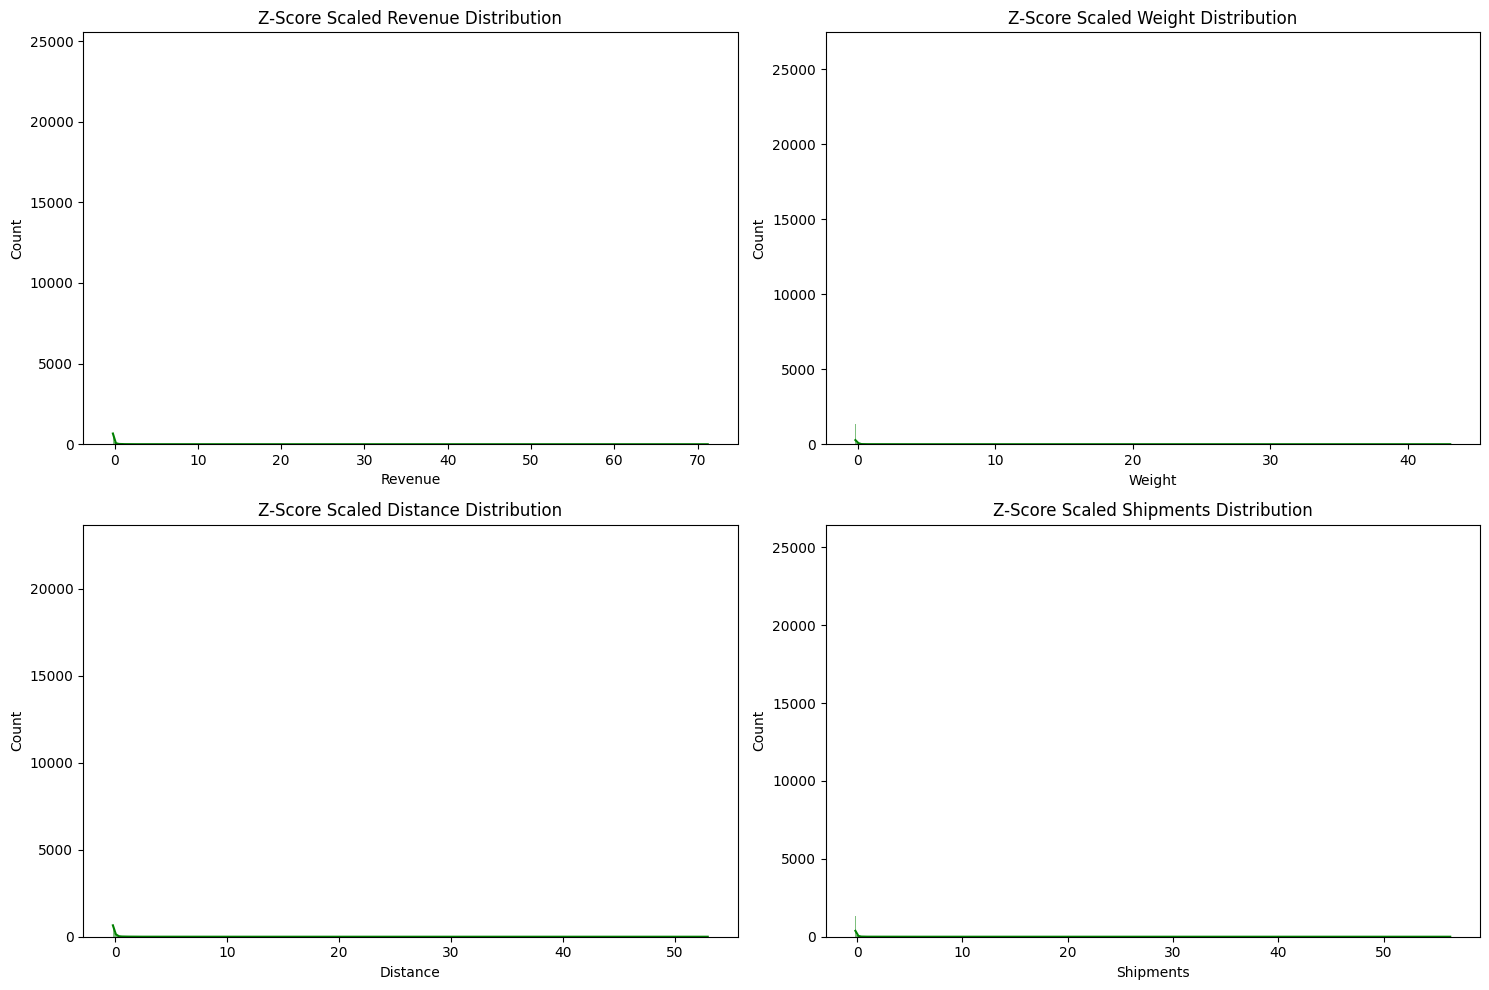

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Reload the original dataset to apply Z-Score scaling to the unscaled data
try:
    df_original_for_zscore = pd.read_csv("/content/drive/MyDrive/Escuela/Maestria/3er Semestre/Programacion Analitica/Proyecto/Dataset/CFAF_C2011-2017_Code_E.csv")

    # Convert necessary columns to numeric, coercing errors
    numerical_cols_for_zscore = ['Revenue', 'Weight', 'Distance', 'TonneKm', 'Shipments', 'Value']
    for col in numerical_cols_for_zscore:
        df_original_for_zscore[col] = pd.to_numeric(df_original_for_zscore[col].astype(str).str.replace(',', ''), errors='coerce')

    # Create a copy of the original data for Z-Score scaling
    df_zscaled = df_original_for_zscore.copy()

    # Initialize the StandardScaler
    scaler_zscore = StandardScaler()

    # Apply the scaler to the selected columns
    df_zscaled[numerical_cols_for_zscore] = scaler_zscore.fit_transform(df_zscaled[numerical_cols_for_zscore])

    print("DataFrame after applying Z-Score Scaling:")
    display(df_zscaled.head())

    # Optional: Visualize the distributions after Z-Score scaling
    import matplotlib.pyplot as plt
    import seaborn as sns

    cols_to_visualize_zscore = ['Revenue', 'Weight', 'Distance', 'Shipments']

    print("\nVisualizing the distributions of Z-Score scaled numerical columns:")

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols_to_visualize_zscore):
        plt.subplot(2, 2, i + 1)
        sns.histplot(df_zscaled[col], kde=True, color='green')
        plt.title(f'Z-Score Scaled {col} Distribution')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: The dataset file was not found. Please ensure the file path is correct.")
    print("File path attempted: /content/drive/MyDrive/Escuela/Maestria/3er Semestre/Programacion Analitica/Proyecto/Dataset/CFAF_C2011-2017_Code_E.csv")

Distribution of 'Revenue' before and after log transformation:


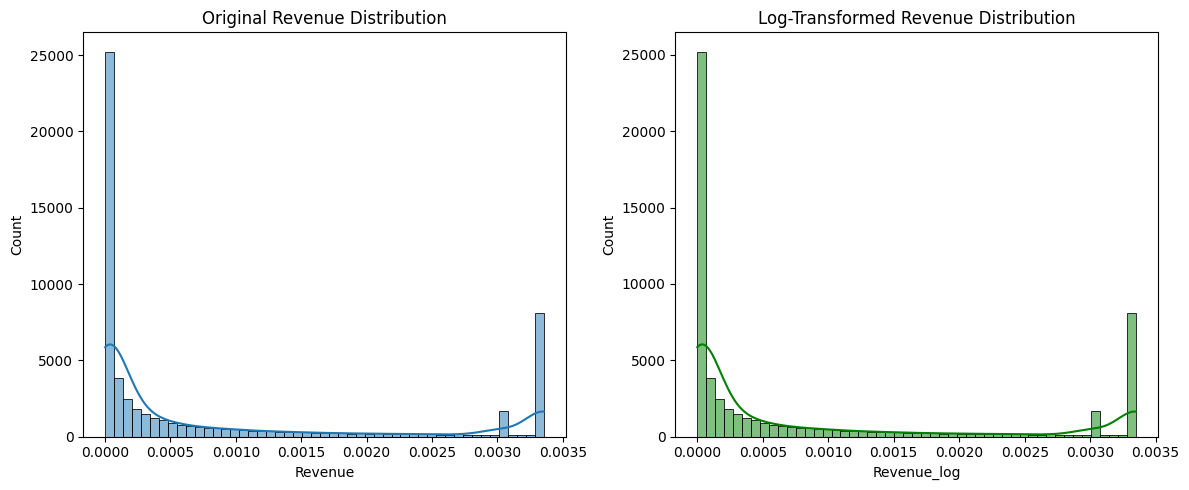

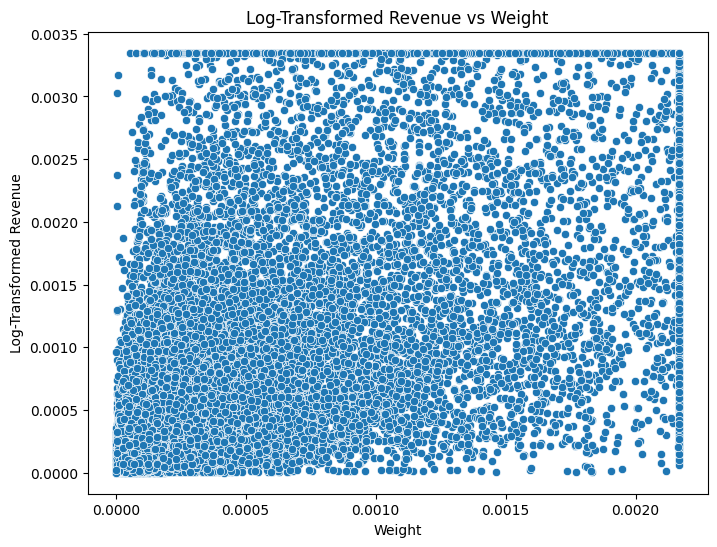

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select a numerical column for logarithmic transformation
# Let's use 'Revenue' as an example, as it often has a skewed distribution
column_to_transform = 'Revenue'

# Apply logarithmic transformation
# Add a small constant (e.g., 1) to handle potential zero values before log transformation
df[f'{column_to_transform}_log'] = np.log1p(df[column_to_transform]) # Using log1p which is log(1+x)

print(f"Distribution of '{column_to_transform}' before and after log transformation:")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[column_to_transform], kde=True)
plt.title(f'Original {column_to_transform} Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df[f'{column_to_transform}_log'], kde=True, color='green')
plt.title(f'Log-Transformed {column_to_transform} Distribution')

plt.tight_layout()
plt.show()

# Generate a scatter plot with a log-transformed axis
# Let's visualize 'Revenue' vs 'Weight' with log-transformed Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Weight', y=f'{column_to_transform}_log')
plt.title(f'Log-Transformed {column_to_transform} vs Weight')
plt.xlabel('Weight')
plt.ylabel(f'Log-Transformed {column_to_transform}')
plt.show()

Generating histograms for additional numerical columns:


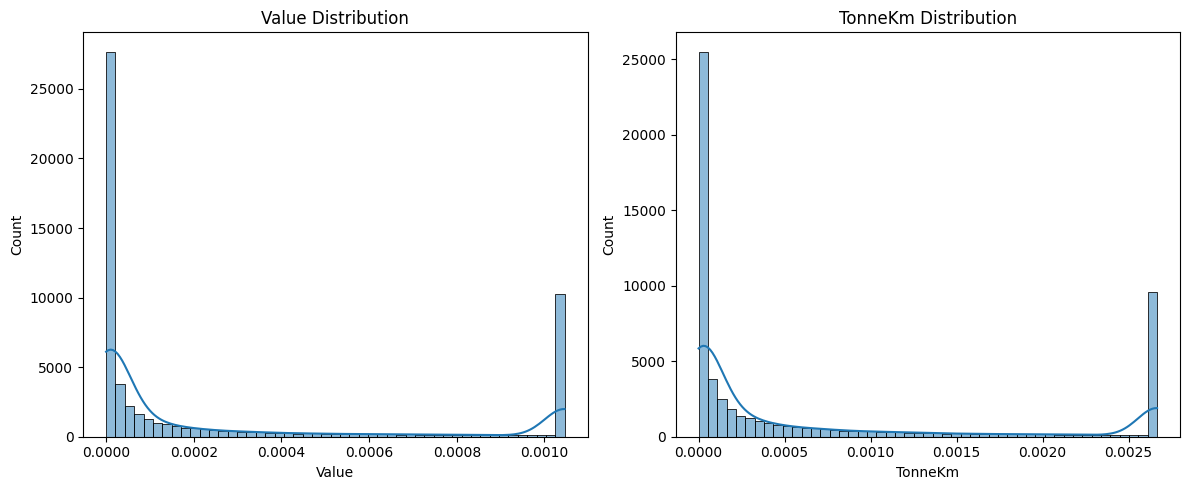

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select some additional numerical columns to visualize with histograms
cols_to_visualize_more = ['Value', 'TonneKm'] # Choosing columns not heavily focused on before

print("Generating histograms for additional numerical columns:")

plt.figure(figsize=(12, 5))

for i, col in enumerate(cols_to_visualize_more):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

Conclusion

La base de datos es muy grande por lo que se van a remover todos los datos que esten fuera de mexico pero eso puede conyevar a que sean datos muy sesgados dando como resultado un mal calculo, por lo que se buscara una base de datos mas consisa

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns to visualize outliers
numerical_cols_for_outliers_viz = ['Revenue', 'Weight', 'Distance', 'TonneKm', 'Shipments', 'Value']

print("Generating box plots to visualize outliers:")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_outliers_viz):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Generating box plots to visualize outliers:
